In [3]:
%matplotlib inline
import numpy as np
import glob
import tqdm
import json
import re

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
def get_iaga_max_stations(tiny=False):
    yearlist = list(np.arange(2010,2019).astype(int))
    if tiny:
        files = [g for y in yearlist for g in sorted(glob.glob(f"../full_data_panos/iaga/{y}/supermag_iaga_tiny*.npz"),key=lambda f: int(re.sub("\D", "", f)),) ]
    else:
        files = [g for y in yearlist for g in sorted(glob.glob(f"../full_data_panos/iaga/{y}/supermag_iaga_[!tiny]*.npz"),key=lambda f: int(re.sub("\D", "", f)),) ]
    assert len(files) > 0
    stations = []

    print("loading supermag iaga data...")
    for i, f in enumerate(tqdm.tqdm(files)):
        x = np.load(f, allow_pickle=True)
        stations.append(x["stations"])

    max_stations = max([len(s) for s in stations])
    return max_stations

In [4]:
get_iaga_max_stations()

loading supermag iaga data...


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 2236.10it/s]


175

In [95]:
def get_iaga_data(path, tiny=False, load_data=True,max_stations=None):
    import glob

    import tqdm

    if tiny:
        files = sorted(
            [f for f in glob.glob(path + "supermag_iaga_tiny*.npz")],
            key=lambda f: int(re.sub("\D", "", f)),
        )
    else:
        files = sorted(
            [f for f in glob.glob(path + "supermag_iaga_[!tiny]*.npz")],
            key=lambda f: int(re.sub("\D", "", f)),
        )
    assert len(files) > 0

    data = []
    dates = []
    stations = []
    # idx = []

    print("loading supermag iaga data...")
    for i, f in enumerate(tqdm.tqdm(files)):
        x = np.load(f, allow_pickle=True)
#         if load_data:
#             data.append(x["data"])
        dates.append(x["dates"])
        # print(np.datetime64(datetime.utcfromtimestamp(dates[-1][0])))
        #idx.extend(data[-1].shape[0] * [i])
        features = x["features"]
#         stations.append(x["stations"])
    if max_stations is None:
        max_stations = max([len(s) for s in stations])
    else:
        max_stations = max_stations
#     for i, d in enumerate(data):
#         data[i] = np.concatenate(
#             [d, np.zeros([d.shape[0], max_stations - d.shape[1], d.shape[2]]) * np.nan],
#             axis=1,
#         )
    dates = np.concatenate(dates)
#     if load_data:
#         data = np.concatenate(data)
    return dates, data, features

In [96]:
def get_iaga_data_as_list(year,tiny=False):
    if isinstance(year,str):
        return get_iaga_data(f"../full_data_panos/iaga/{year}/",tiny=tiny)
    elif isinstance(year,list):
        dates = []
        data = [] 
        features = []
        max_stations = get_iaga_max_stations()
        for y in year:
            dt,dat,feat = get_iaga_data(f"../full_data_panos/iaga/{y}/",tiny=tiny,max_stations=max_stations)
            dates.append(dt)
#             data.append(dat)
#             features.append(feat)
        return np.concatenate(dates,axis=0)#,np.concatenate(data,axis=0),feat
    else:
        raise TypeError("year must be either a list of years, or a single year.")


In [97]:
yearlist = list(np.arange(2010,2019).astype(int))
print(yearlist)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [98]:
dt = get_iaga_data_as_list(yearlist)

loading supermag iaga data...


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 2275.25it/s]


loading supermag iaga data...


100%|███████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 746.00it/s]


loading supermag iaga data...


100%|████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 24.59it/s]


loading supermag iaga data...


100%|████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 20.71it/s]


loading supermag iaga data...


100%|████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 18.82it/s]


loading supermag iaga data...


100%|████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 19.32it/s]


loading supermag iaga data...


100%|████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 19.84it/s]


loading supermag iaga data...


100%|████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 22.06it/s]


loading supermag iaga data...


100%|████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 19.03it/s]


loading supermag iaga data...


100%|████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 23.37it/s]


In [99]:
dt.shape

(4733280,)

In [23]:
np.max(np.asarray(test_inds),axis=0)

array([4732679, 4733279])

In [29]:
v = data[np.asarray(test_inds)[:,0],:,:]

In [32]:
inds[0,1]-inds[0,0]

600

In [ ]:
data[np.r_[inds],:,:].shape

In [10]:
inds

array([[      0,     600],
       [      1,     601],
       [      2,     602],
       ...,
       [4732677, 4733277],
       [4732678, 4733278],
       [4732679, 4733279]])

In [43]:
tmp = np.arange(200).reshape([20,5,2])

In [44]:
tmp.shape

(20, 5, 2)

In [50]:
inds = np.asarray([[0,3],[15,18]])
inds

array([[ 0,  3],
       [15, 18]])

In [51]:
new_inds = np.linspace(inds[:,0],inds[:,1],(inds[:,1]-inds[:,0])[0]+1).astype(int)
new_inds

array([[ 0, 15],
       [ 1, 16],
       [ 2, 17],
       [ 3, 18]])

In [52]:
tmp[new_inds.T,:,:].shape

(2, 4, 5, 2)

In [48]:
tmp

array([[[  0,   1],
        [  2,   3],
        [  4,   5],
        [  6,   7],
        [  8,   9]],

       [[ 10,  11],
        [ 12,  13],
        [ 14,  15],
        [ 16,  17],
        [ 18,  19]],

       [[ 20,  21],
        [ 22,  23],
        [ 24,  25],
        [ 26,  27],
        [ 28,  29]],

       [[ 30,  31],
        [ 32,  33],
        [ 34,  35],
        [ 36,  37],
        [ 38,  39]],

       [[ 40,  41],
        [ 42,  43],
        [ 44,  45],
        [ 46,  47],
        [ 48,  49]],

       [[ 50,  51],
        [ 52,  53],
        [ 54,  55],
        [ 56,  57],
        [ 58,  59]],

       [[ 60,  61],
        [ 62,  63],
        [ 64,  65],
        [ 66,  67],
        [ 68,  69]],

       [[ 70,  71],
        [ 72,  73],
        [ 74,  75],
        [ 76,  77],
        [ 78,  79]],

       [[ 80,  81],
        [ 82,  83],
        [ 84,  85],
        [ 86,  87],
        [ 88,  89]],

       [[ 90,  91],
        [ 92,  93],
        [ 94,  95],
        [ 96,  97],
  

In [53]:
tmp[new_inds.T,:,:]

array([[[[  0,   1],
         [  2,   3],
         [  4,   5],
         [  6,   7],
         [  8,   9]],

        [[ 10,  11],
         [ 12,  13],
         [ 14,  15],
         [ 16,  17],
         [ 18,  19]],

        [[ 20,  21],
         [ 22,  23],
         [ 24,  25],
         [ 26,  27],
         [ 28,  29]],

        [[ 30,  31],
         [ 32,  33],
         [ 34,  35],
         [ 36,  37],
         [ 38,  39]]],


       [[[150, 151],
         [152, 153],
         [154, 155],
         [156, 157],
         [158, 159]],

        [[160, 161],
         [162, 163],
         [164, 165],
         [166, 167],
         [168, 169]],

        [[170, 171],
         [172, 173],
         [174, 175],
         [176, 177],
         [178, 179]],

        [[180, 181],
         [182, 183],
         [184, 185],
         [186, 187],
         [188, 189]]]])

In [7]:
inds = np.asarray(test_inds)
inds[:100].shape

(100, 2)

In [5]:
with open("../train.txt") as f:
    test_inds = json.load(f)

In [81]:
inds = np.asarray(test_inds)
new_inds = np.linspace(inds[:,0],inds[:,1],(inds[:,1]-inds[:,0])[0]+1).astype(int)
new_inds

array([[      0,       1,       2, ..., 4732677, 4732678, 4732679],
       [      1,       2,       3, ..., 4732678, 4732679, 4732680],
       [      2,       3,       4, ..., 4732679, 4732680, 4732681],
       ...,
       [    598,     599,     600, ..., 4733275, 4733276, 4733277],
       [    599,     600,     601, ..., 4733276, 4733277, 4733278],
       [    600,     601,     602, ..., 4733277, 4733278, 4733279]])

In [75]:
yearlist = list(np.arange(2010,2018).astype(str))
omni_data = pd.concat([pd.read_hdf("../data_local/omni/sw_data.h5", key=y,mode='r') for y in yearlist])

In [76]:
omni_data.head()

,bx,by,bz,vx,vy,vz,density,psw,temperature,xgse,ygse,zgse,clock_angle
2010-01-01 00:00:00,0.02,2.98,-0.39,-283.0,9.7,0.7,3.85,0.62,24931.0,231.23,13.0,13.0,1.700929
2010-01-01 00:01:00,0.13,2.96,-0.51,-283.0,9.7,0.7,3.85,0.62,24931.0,231.23,13.0,13.0,1.741418
2010-01-01 00:02:00,0.14,2.99,-0.37,-283.7,10.2,-5.2,3.92,0.63,24931.0,231.23,13.0,13.0,1.693916
2010-01-01 00:03:00,0.04,3.01,-0.23,-283.7,10.2,-5.3,3.92,0.63,24931.0,231.23,13.0,13.0,1.647060
2010-01-01 00:04:00,0.07,3.00,-0.46,-283.6,9.6,-4.1,4.02,0.65,25005.0,231.22,13.0,13.0,1.722945


In [85]:
np.stack([omni_data.iloc[v].to_numpy() for v in list(new_inds.T)[:100]],axis=0).shape

(100, 601, 13)

In [24]:
omni_data.iloc[np.r_[10:20,40:50]].to_numpy().shape

(20, 13)

In [41]:
test_inds[0],test_inds[1]

([662648, 663248], [662649, 663249])

In [42]:
test_inds[-1],test_inds[-2]

([3833291, 3833891], [3833290, 3833890])

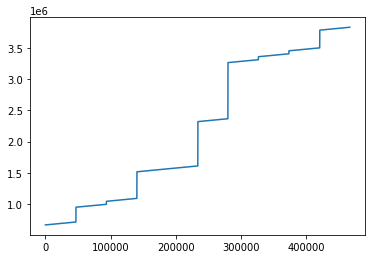

In [47]:
plt.plot(inds[:,0])

In [54]:
inds[np.argmax((inds[:,1]-inds[:,0]))-1],inds[np.argmax((inds[:,1]-inds[:,0]))],inds[np.argmax((inds[:,1]-inds[:,0]))+1]

(array([3501967, 3502567]),
 array([3501968, 3786560]),
 array([3501969, 3786561]))

In [56]:
np.where((inds[:,1]-inds[:,0])!=600)

(array([419988, 419989, 419990, 419991, 419992, 419993, 419994, 419995,
        419996, 419997, 419998, 419999, 420000, 420001, 420002, 420003,
        420004, 420005, 420006, 420007, 420008, 420009, 420010, 420011,
        420012, 420013, 420014, 420015, 420016, 420017, 420018, 420019,
        420020, 420021, 420022, 420023, 420024, 420025, 420026, 420027,
        420028, 420029, 420030, 420031, 420032, 420033, 420034, 420035,
        420036, 420037, 420038, 420039, 420040, 420041, 420042, 420043,
        420044, 420045, 420046, 420047, 420048, 420049, 420050, 420051,
        420052, 420053, 420054, 420055, 420056, 420057, 420058, 420059,
        420060, 420061, 420062, 420063, 420064, 420065, 420066, 420067,
        420068, 420069, 420070, 420071, 420072, 420073, 420074, 420075,
        420076, 420077, 420078, 420079, 420080, 420081, 420082, 420083,
        420084, 420085, 420086, 420087, 420088, 420089, 420090, 420091,
        420092, 420093, 420094, 420095, 420096, 420097, 420098, 

In [61]:
v = [t[1]-t[0] for t in test_inds]

In [68]:
np.where(np.asarray(v)!=600)

(array([419988, 419989, 419990, 419991, 419992, 419993, 419994, 419995,
        419996, 419997, 419998, 419999, 420000, 420001, 420002, 420003,
        420004, 420005, 420006, 420007, 420008, 420009, 420010, 420011,
        420012, 420013, 420014, 420015, 420016, 420017, 420018, 420019,
        420020, 420021, 420022, 420023, 420024, 420025, 420026, 420027,
        420028, 420029, 420030, 420031, 420032, 420033, 420034, 420035,
        420036, 420037, 420038, 420039, 420040, 420041, 420042, 420043,
        420044, 420045, 420046, 420047, 420048, 420049, 420050, 420051,
        420052, 420053, 420054, 420055, 420056, 420057, 420058, 420059,
        420060, 420061, 420062, 420063, 420064, 420065, 420066, 420067,
        420068, 420069, 420070, 420071, 420072, 420073, 420074, 420075,
        420076, 420077, 420078, 420079, 420080, 420081, 420082, 420083,
        420084, 420085, 420086, 420087, 420088, 420089, 420090, 420091,
        420092, 420093, 420094, 420095, 420096, 420097, 420098, 

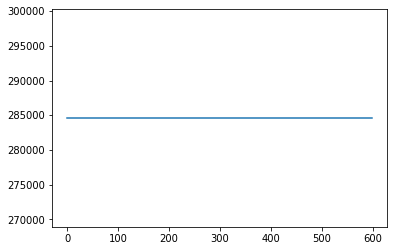

In [73]:
plt.plot(inds[419988:420587,1]-inds[419988:420587,0])

In [74]:
inds[419988:420587,1]-inds[419988:420587,0]

array([284592, 284592, 284592, 284592, 284592, 284592, 284592, 284592,
       284592, 284592, 284592, 284592, 284592, 284592, 284592, 284592,
       284592, 284592, 284592, 284592, 284592, 284592, 284592, 284592,
       284592, 284592, 284592, 284592, 284592, 284592, 284592, 284592,
       284592, 284592, 284592, 284592, 284592, 284592, 284592, 284592,
       284592, 284592, 284592, 284592, 284592, 284592, 284592, 284592,
       284592, 284592, 284592, 284592, 284592, 284592, 284592, 284592,
       284592, 284592, 284592, 284592, 284592, 284592, 284592, 284592,
       284592, 284592, 284592, 284592, 284592, 284592, 284592, 284592,
       284592, 284592, 284592, 284592, 284592, 284592, 284592, 284592,
       284592, 284592, 284592, 284592, 284592, 284592, 284592, 284592,
       284592, 284592, 284592, 284592, 284592, 284592, 284592, 284592,
       284592, 284592, 284592, 284592, 284592, 284592, 284592, 284592,
       284592, 284592, 284592, 284592, 284592, 284592, 284592, 284592,
      

In [79]:
omni_data.iloc[419988:420587]

,bx,by,bz,vx,vy,vz,density,psw,temperature,xgse,ygse,zgse,clock_angle
2010-10-19 15:48:00,-1.31,-5.90,2.41,-424.6,-21.0,-45.3,5.15,1.88,167238.0,236.53,12.77,12.77,5.100180
2010-10-19 15:49:00,-0.80,-5.98,2.14,-428.8,-18.0,-45.7,5.22,1.94,163844.0,236.53,12.77,12.77,5.056048
2010-10-19 15:50:00,-1.04,-5.74,2.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.130452
2010-10-19 15:51:00,-1.03,-5.78,2.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.082111
2010-10-19 15:52:00,-1.59,-5.58,2.02,-426.8,-13.1,-49.5,6.00,2.22,178055.0,236.53,12.77,12.77,5.059720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-10-20 01:42:00,2.65,-2.22,-0.70,-442.0,9.5,-25.6,3.98,1.56,162780.0,236.94,13.04,13.04,4.406941
2010-10-20 01:43:00,2.46,-2.15,-0.85,-442.9,11.0,-31.5,3.96,1.56,160874.0,236.93,13.03,13.03,4.335899
2010-10-20 01:44:00,2.61,-2.12,-0.65,-443.2,9.7,-24.7,3.92,1.55,166305.0,236.94,13.04,13.04,4.414885
2010-10-20 01:45:00,2.49,-2.25,-0.65,-444.1,9.3,-29.3,4.05,1.61,167045.0,236.93,13.03,13.03,4.431157


In [100]:
check_inds = new_inds.T[:100]

In [86]:
f107 = np.load("../data_local/f107.npz")["dates"]

In [129]:
f107[120]

numpy.datetime64('1947-07-18T00:00:00.000000000')

In [144]:
help(np.datetime64)

Help on class datetime64 in module numpy:

class datetime64(generic)
 |  A datetime stored as a 64-bit integer, counting from ``1970-01-01T00:00:00``.
 |  
 |  >>> np.datetime64(10, 'Y')
 |  numpy.datetime64('1980')
 |  >>> np.datetime64(10, 'D')
 |  numpy.datetime64('1970-01-11')
 |  
 |  See :ref:`arrays.datetime` for more information.
 |  
 |  :Character code: ``'M'``
 |  
 |  Method resolution order:
 |      datetime64
 |      generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __str__(self, /)
 |      Re

In [165]:
v = dt[check_inds.astype(int)]

In [166]:
v

array([[1.26230400e+09, 1.26230406e+09, 1.26230412e+09, ...,
        1.26233988e+09, 1.26233994e+09, 1.26234000e+09],
       [1.26230406e+09, 1.26230412e+09, 1.26230418e+09, ...,
        1.26233994e+09, 1.26234000e+09, 1.26234006e+09],
       [1.26230412e+09, 1.26230418e+09, 1.26230424e+09, ...,
        1.26234000e+09, 1.26234006e+09, 1.26234012e+09],
       ...,
       [1.26230982e+09, 1.26230988e+09, 1.26230994e+09, ...,
        1.26234570e+09, 1.26234576e+09, 1.26234582e+09],
       [1.26230988e+09, 1.26230994e+09, 1.26231000e+09, ...,
        1.26234576e+09, 1.26234582e+09, 1.26234588e+09],
       [1.26230994e+09, 1.26231000e+09, 1.26231006e+09, ...,
        1.26234582e+09, 1.26234588e+09, 1.26234594e+09]])

In [169]:
v.reshape(-1).reshape(list(v.shape))-v

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [172]:
tmp = pd.to_datetime(dt[check_inds.astype(int)].reshape(-1),unit='s').to_numpy().reshape(list(v.shape))

In [131]:
dt_subset = np.datetime64(datetime.utcfromtimestamp(dt[check_inds.astype(int)]).replace(hour=0, minute=0))

ValueError: Could not convert object to NumPy datetime

In [173]:
match = np.argmin(np.abs(np.expand_dims(tmp,axis=-1)-f107.reshape([1,1,-1])),axis=-1)

In [175]:
f107[match].shape

(100, 601)